# Import Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset

In [44]:
data = pd.read_csv('car.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [45]:
np.unique(data['origin'].values)

array(['europe', 'japan', 'usa'], dtype=object)

In [46]:
np.unique(data['model_year'].values)

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [47]:
np.unique(data['cylinders'].values)

array([3, 4, 5, 6, 8], dtype=int64)

# Data Preprocessing

## missing values

In [48]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [50]:
# Handle missing values (if necessary)
# For example, to remove rows with missing values:
# data.dropna(inplace=True)

# Handling missing values (if any)
# Example: Fill missing values with the mean of the column
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())

# Check for outliers using IQR
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
# print("\nOutliers in each column:")
# print(outliers)


In [51]:
len(data)

398

In [52]:
# Check for duplicated values
print("\nDuplicated Values:")
print(data.duplicated().sum())

# Remove duplicates
# df = df.drop_duplicates()


Duplicated Values:
0


In [53]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


No duplicates

## Drop certain columns

In [56]:
dataset = data.drop(["name"], axis='columns')

In [57]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


## Give unique labels to origin

In [59]:
def assign_labels(df, column_name):
    unique_values = df[column_name].unique()
    labels = {value: i for i, value in enumerate(unique_values)}
    df[column_name] = df[column_name].map(labels)
    return df

In [60]:
dataset = assign_labels(dataset, 'origin')

In [61]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0


# Data Visualization

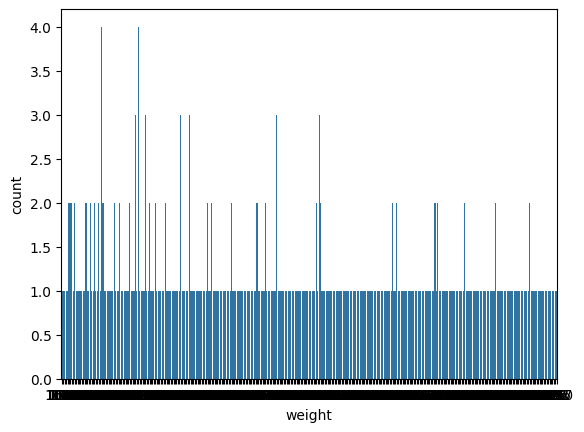

C:\Users\hp\AppData\Local\Temp\ipykernel_7924\1466960903.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


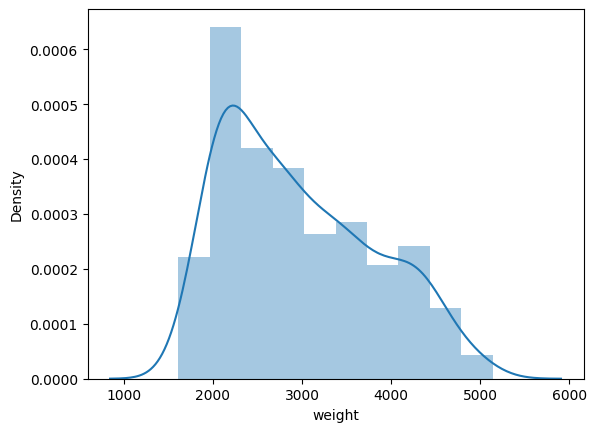

In [75]:
import seaborn as sns
column = 'weight'
sns.countplot(x=column, data=dataset)  
plt.show()

sns.distplot(dataset[column]) 
plt.show()


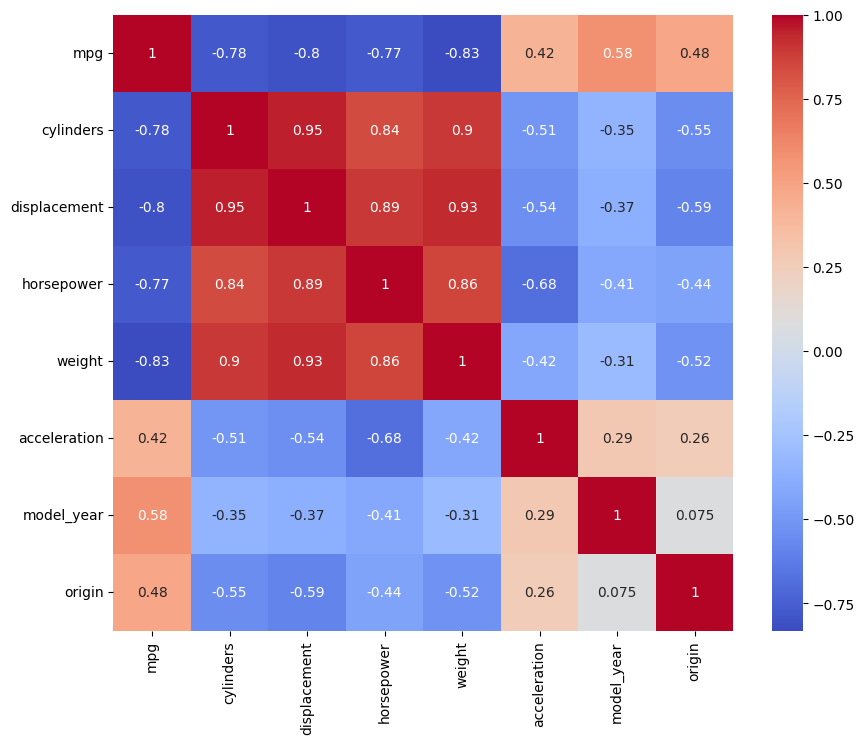

In [69]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

C:\Users\hp\anaconda3\envs\dl\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


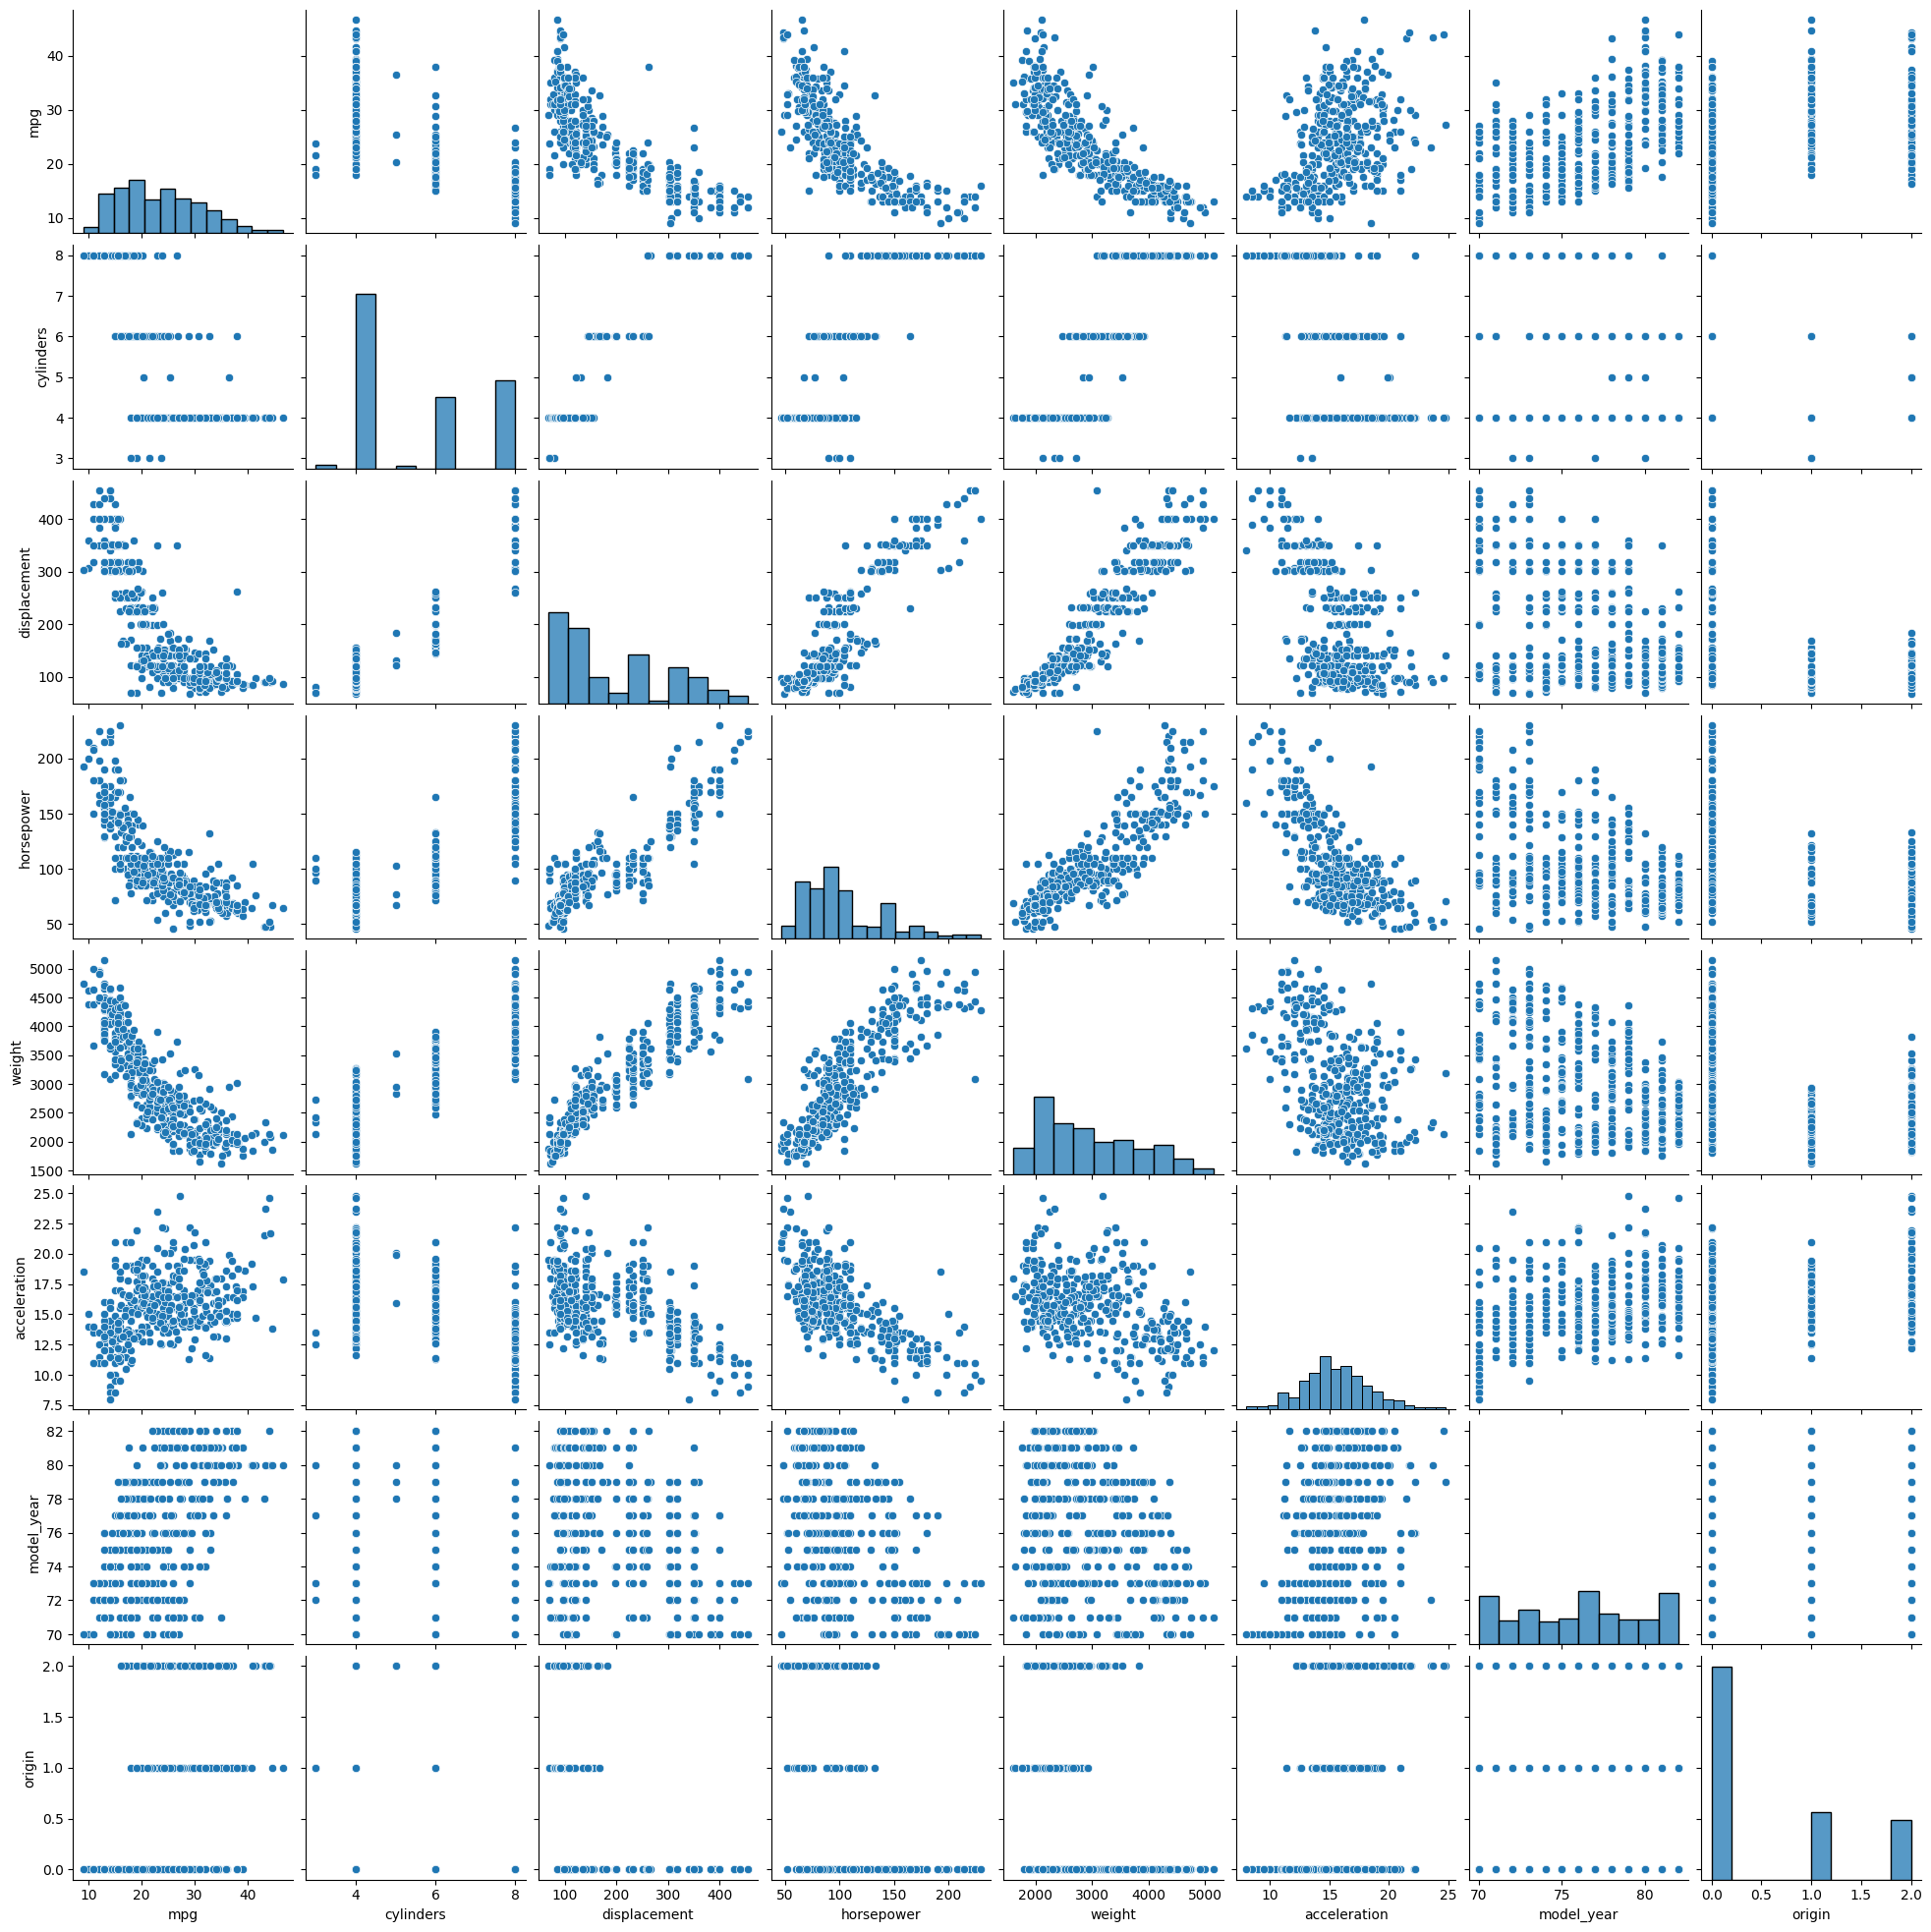

In [81]:
sns.pairplot(dataset)
plt.show()

# Define target and input

In [63]:
# Define features and target variable
X = dataset.drop('mpg', axis=1)  # Replace 'target_column' with your actual target column
y = dataset['mpg']  # Replace 'target_column' with your actual target column

In [64]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [76]:
# Model Building
model = LinearRegression()

# Model Training
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

In [77]:
# Model Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 2.42931070474114
Mean Squared Error (MSE): 8.881738481148904
R-squared (R2): 0.8348088907935463


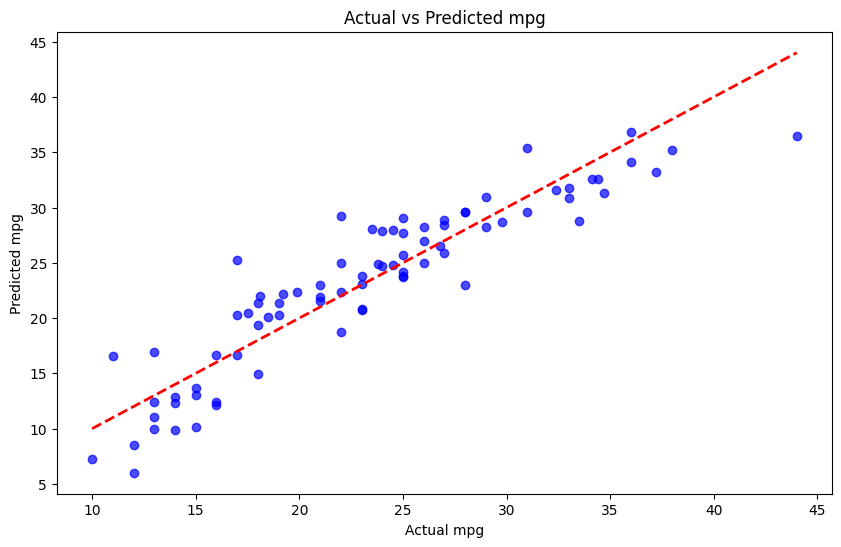

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', linewidth=2)
plt.xlabel('Actual mpg')
plt.ylabel('Predicted mpg')
plt.title('Actual vs Predicted mpg')
plt.show()